In [1]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


## 1、导入数据

In [2]:
import pandas as pd


def load_data(file_path: str) -> pd.DataFrame:
    """读取excel文件，转化为DataFrame
    :param file_path: 文件路径
    :return: 数据的DataFrame格式
    """
    data = pd.read_excel(file_path, index_col=u'净值日期')
    # 将--替换为0，将%去掉再乘以100
    data[u'日增长率'] = data[u'日增长率'].map(lambda x: 100 * float(str(x).replace('%', '').replace('--', '0')))
    data = data.sort_index(ascending=True)
    return data
files = 'huangjin.xls', 'hushen.xls', 'yousejinshuETF.xls', 'zhongzhengguozhai.xls'
huangjin, hushen, youse, zhongzheng = list(map(load_data, files))

In [3]:
files = 'huangjin.xls', 'hushen.xls', 'yousejinshuETF.xls', 'zhongzhengguozhai.xls'
huangjin, hushen, youse, zhongzheng = list(map(load_data, files))

In [4]:
huangjin

,单位净值,累计净值,日增长率,申购状态,赎回状态,分红送配
净值日期,,,,,,
2019-01-02,0.714,0.714,-0.14,暂停申购,暂停赎回,NaN
2019-01-03,0.722,0.722,1.12,限制大额申购,开放赎回,NaN
2019-01-04,0.716,0.716,-0.83,限制大额申购,开放赎回,NaN
2019-01-07,0.719,0.719,0.42,限制大额申购,开放赎回,NaN
2019-01-08,0.715,0.715,-0.56,限制大额申购,开放赎回,NaN
...,...,...,...,...,...,...
2021-12-27,0.871,0.871,0.23,暂停申购,暂停赎回,NaN
2021-12-28,0.869,0.869,-0.23,暂停申购,暂停赎回,NaN
2021-12-29,0.867,0.867,-0.23,限制大额申购,开放赎回,NaN


### 1.1、日收益率数据可视化

<AxesSubplot:xlabel='净值日期'>

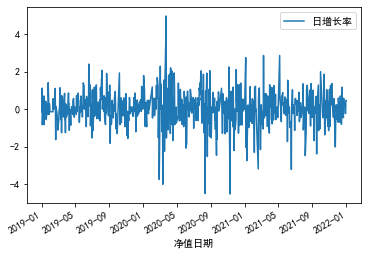

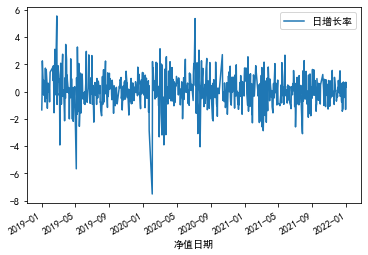

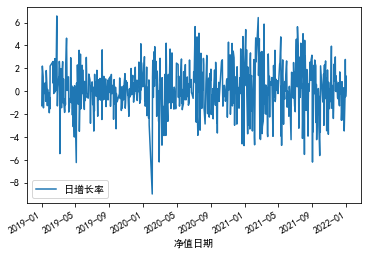

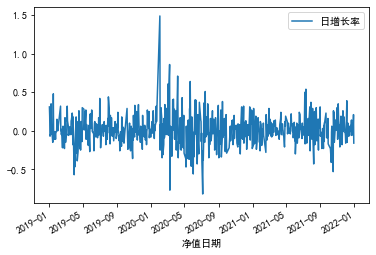

In [5]:
huangjin[[u'日增长率']].plot()
hushen[[u'日增长率']].plot()
youse[[u'日增长率']].plot()
zhongzheng[[u'日增长率']].plot()

In [6]:
zhongzheng

,单位净值,累计净值,日增长率,申购状态,赎回状态,分红送配
净值日期,,,,,,
2019-01-02,106.7490,1.0675,0.31,场内买入,场内卖出,NaN
2019-01-03,106.9524,1.0695,0.19,场内买入,场内卖出,NaN
2019-01-04,106.8817,1.0688,-0.07,场内买入,场内卖出,NaN
2019-01-07,106.8420,1.0684,-0.04,场内买入,场内卖出,NaN
2019-01-08,107.2120,1.0721,0.35,场内买入,场内卖出,NaN
...,...,...,...,...,...,...
2021-12-27,116.2288,1.1623,0.09,场内买入,场内卖出,NaN
2021-12-28,116.3466,1.1635,0.10,场内买入,场内卖出,NaN
2021-12-29,116.4390,1.1644,0.08,场内买入,场内卖出,NaN


## 2、平稳性检验

### 2.1、自相关图&偏自相关图

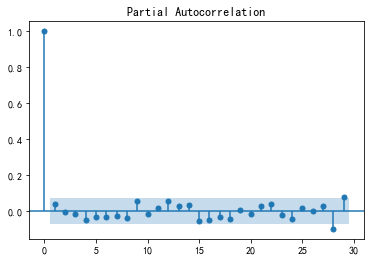

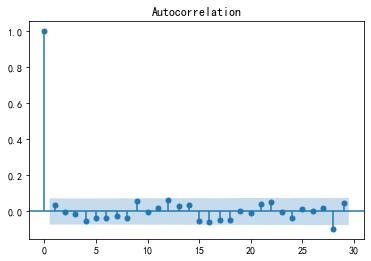

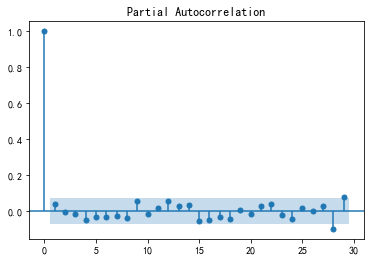

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(huangjin[u'日增长率'])
plot_pacf(huangjin[u'日增长率'])

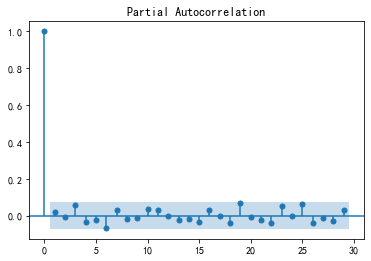

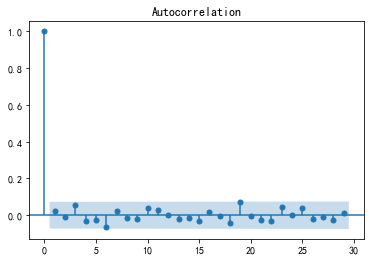

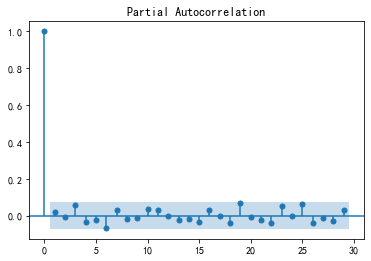

In [8]:
plot_acf(hushen[u'日增长率'])
plot_pacf(hushen[u'日增长率'])

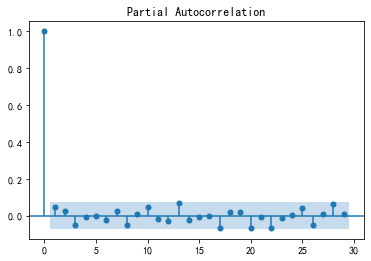

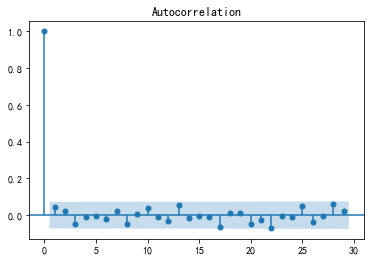

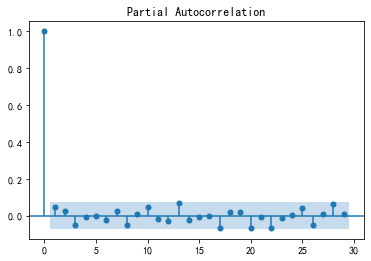

In [9]:
plot_acf(youse[u'日增长率'])
plot_pacf(youse[u'日增长率'])

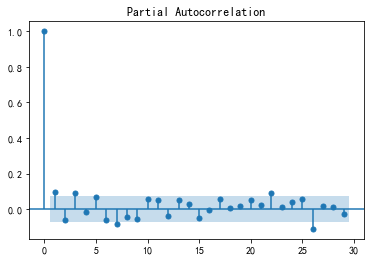

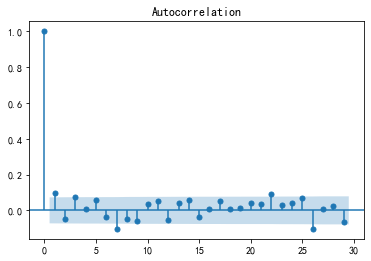

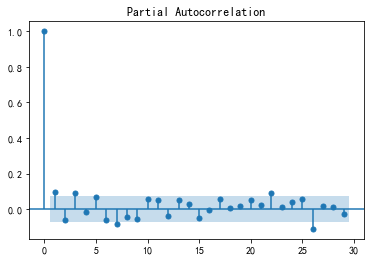

In [10]:
plot_acf(zhongzheng[u'日增长率'])
plot_pacf(zhongzheng[u'日增长率'])

### 2.2、平稳性检验

In [11]:
from statsmodels.tsa.stattools import adfuller as ADF

print('黄金：', ADF(huangjin[u'日增长率']))
print('沪深：', ADF(hushen[u'日增长率']))
print('有色金属：', ADF(youse[u'日增长率']))
print('中证国债：', ADF(zhongzheng[u'日增长率']))

黄金： (-25.964945292616875, 0.0, 0, 730, {'1%': -3.4393396487377155, '5%': -2.865507363200066, '10%': -2.5688826684180897}, 1889.3629285711947)
沪深： (-26.464940988223482, 0.0, 0, 730, {'1%': -3.4393396487377155, '5%': -2.865507363200066, '10%': -2.5688826684180897}, 2257.929732297735)
有色金属： (-25.79443408889127, 0.0, 0, 730, {'1%': -3.4393396487377155, '5%': -2.865507363200066, '10%': -2.5688826684180897}, 2994.382101226047)
中证国债： (-10.743093187778326, 2.7856609068299907e-19, 6, 724, {'1%': -3.4394144152232995, '5%': -2.8655403100177566, '10%': -2.5689002207655443}, -348.1632621818144)


返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore
从上表看出，各资产的ADF检验值均小于1%时的临界值，且p值趋于0，拒绝原假设，
因此收益率时间序列都是平稳的。

## 3、ARMA定阶

定阶就是选择p和q的范围，这里我们选用BIC检验，组合各种p和q,获取最小BIC值的p和q。

In [12]:
from statsmodels.tools.sm_exceptions import ValueWarning
from statsmodels.tsa.arima_model import ARIMA, ARMAResultsWrapper
from typing import Optional

import warnings

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        ValueWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        ValueWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

def get_best_p_q_by_bic(data: pd.DataFrame, p_max: Optional[int] = None, q_max: Optional[int] = None) -> (int, int):
    """
    通过BIC检验选择最佳的p q参数组合
    :param data: 数据集
    :param p_max: p值候选集的最大值
    :param q_max: q值候选集的最大值
    :return: 最佳p和q
    """
    data_length = len(data)
    # 一般阶数不超过 length / 10
    p_max = int(data_length / 10) if p_max is None else p_max
    q_max = int(data_length / 10) if q_max is None else q_max
    # BIC矩阵
    bic_matrix = []
    for p in range(p_max + 1):
        tmp = []
        for q in range(q_max + 1):
            try:  # 存在部分报错，所以用try来跳过报错。
                print('p=%s, q=%s, bic:' % (p, q))
                bic = ARIMA(data[[u'日增长率']], (p, 1, q)).fit().bic
                print(bic)
                tmp.append(bic)
            except:
                tmp.append(None)
        bic_matrix.append(tmp)
    bic_matrix = pd.DataFrame(bic_matrix)
    # 先用stack展平，然后用idxmin找出最小值位置。
    return bic_matrix.stack().idxmin()


In [13]:
p_max, q_max = 5, 5
huangjin_p_q = get_best_p_q_by_bic(huangjin, p_max=p_max, q_max=q_max)
hushen_p_q = get_best_p_q_by_bic(hushen, p_max=p_max, q_max=q_max)
youse_p_q = get_best_p_q_by_bic(youse, p_max=p_max, q_max=q_max)
zhongzheng_p_q = get_best_p_q_by_bic(zhongzheng, p_max=p_max, q_max=q_max)

p=0, q=0, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has

2418.4644697965305
p=0, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1952.7366572705755
p=0, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1958.2942753615348
p=0, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1964.8848510012945
p=0, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1971.3423886559676
p=0, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1975.9256007136282
p=1, q=0, bic:
2234.8596344553002
p=1, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

1958.3004478824957
p=1, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1963.5191744565382
p=1, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1969.688764171715
p=1, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1976.2060750713658
p=1, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1982.2612370059537
p=2, q=0, bic:
2165.147172490293
p=2, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

1964.8804501593156
p=2, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1969.6808212351834
p=2, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1976.2619923335565
p=2, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

1982.671031259708
p=2, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


1986.6346921112718
p=3, q=0, bic:
2137.444837760234
p=3, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

1971.276482196441
p=3, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

1978.066375906398
p=3, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1976.0717065585768
p=3, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1980.9355773018042
p=3, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

1987.1971663260606
p=4, q=0, bic:
2116.481375484313
p=4, q=1, bic:
1976.0227284520236
p=4, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1982.199754612635
p=4, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1986.6083631808297
p=4, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1987.3086251622735
p=4, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

1999.117358204792
p=5, q=0, bic:
2103.805488464949
p=5, q=1, bic:
1981.8501606251589
p=5, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1987.7275677390078
p=5, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1992.379829794504
p=5, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

1995.189637687787
p=5, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

2004.3056377984883
p=0, q=0, bic:
2813.643035162432
p=0, q=1, bic:
2335.166849506755
p=0, q=2, bic:
2341.4721651633586
p=0, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2347.970496824449
p=0, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2351.8813466893994
p=0, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2357.478749008618
p=1, q=0, bic:
2624.24883587719
p=1, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

2341.4779249485173
p=1, q=2, bic:
2348.074136368251
p=1, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

2354.648851594096
p=1, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2357.4669909887525
p=1, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

2362.876404173792
p=2, q=0, bic:
2524.0188550099792
p=2, q=1, bic:
2348.0109646710157
p=2, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2351.4080474353987
p=2, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

2360.429939116622
p=2, q=4, bic:
2363.344436168134
p=2, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

2368.7967362755057
p=3, q=0, bic:
2500.551910116283
p=3, q=1, bic:
2352.33149039945
p=3, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2357.591578046352
p=3, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

2363.337424022111
p=3, q=4, bic:
2361.2387798352033
p=3, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

2374.0627525657897
p=4, q=0, bic:
2483.405461185957
p=4, q=1, bic:
2357.980928311428
p=4, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2362.8762780096176
p=4, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

2368.8925727009164
p=4, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2373.80353289551
p=4, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2373.677854415214
p=5, q=0, bic:
2479.9908450770995
p=5, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2364.2013401392314
p=5, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2368.8532759430773
p=5, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2374.082918542186
p=5, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

2383.506980282823
p=5, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

p=0, q=0, bic:
3546.8470805990037
p=0, q=1, bic:
3088.0807094646448
p=0, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3093.1815687829976
p=0, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3099.0878871831137
p=0, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3103.8938847234563
p=0, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3110.475441221504
p=1, q=0, bic:
3354.2509545878174
p=1, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

3093.100751807146
p=1, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

3096.929246491225
p=1, q=3, bic:
3104.9011508680655
p=1, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3110.4681697115698
p=1, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

3112.163242608758
p=2, q=0, bic:
3302.6858482315643
p=2, q=1, bic:
3099.2814792329805
p=2, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

3102.5026386554887
p=2, q=3, bic:
3100.305547591325
p=2, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3105.9000351095187
p=2, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3112.377225973117
p=3, q=0, bic:
3260.6961884088987
p=3, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

3103.941354863274
p=3, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3110.5178699161647
p=3, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3105.8802285996826
p=3, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

3113.0996865294333
p=3, q=5, bic:
3118.8681815446175
p=4, q=0, bic:
3235.3779058330674
p=4, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

3110.5181435783365
p=4, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

3112.160723485844
p=4, q=3, bic:
3122.209657748886
p=4, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

3116.1582608587955
p=4, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3118.289670420337
p=5, q=0, bic:
3225.256911992674
p=5, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3117.1091830796245
p=5, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3122.3300102983058
p=5, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

3118.489147099402
p=5, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


3124.7813342617283
p=5, q=5, bic:
3131.389664154043
p=0, q=0, bic:
89.79451519133269
p=0, q=1, bic:
-325.2916052959751
p=0, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

-327.1277214365837
p=0, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-323.85693986953123
p=0, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-322.94193664020105
p=0, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-316.4335497264408
p=1, q=0, bic:
-43.55063676557636
p=1, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

-326.08132891493375
p=1, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:218: RuntimeWarning: divide by zero encountered in true_divide
  loglike, sigma2 = kalman_loglike.kalman_loglike_double(


-328.17011101424254
p=1, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-321.60943558825085
p=1, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-316.81184396051026
p=1, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

-309.83915466290193
p=2, q=0, bic:
-160.02670089028612
p=2, q=1, bic:
-321.9153764422853
p=2, q=2, bic:
p=2, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:470: RuntimeWarning: invalid value encountered in subtract
  dx = ((x0 + h) - x0)
C:\Users\chenxilin\Install\Anaconda3\lib\site-pa

-314.98734664216886
p=2, q=4, bic:
-310.4074031525662
p=2, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=3, q=0, bic:
-185.3854244800836
p=3, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

-321.21235331718555
p=3, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-316.1477865370109
p=3, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-311.7515722271743
p=3, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

-317.1438064222998
p=3, q=5, bic:
-312.83734308599185
p=4, q=0, bic:
-222.98036719657952
p=4, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A

-311.9376807272736
p=4, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-309.7750122981016
p=4, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-315.0355471312746
p=4, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated freq

-312.80454249401
p=4, q=5, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

-306.2787483033983
p=5, q=0, bic:
-221.94789406577658
p=5, q=1, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-311.96499133482587
p=5, q=2, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-306.14733210231316
p=5, q=3, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


-314.6783951233673
p=5, q=4, bic:


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated freq

-308.6689206235976
p=5, q=5, bic:
-304.37291758238115


C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
huangjin_p_q, hushen_p_q, youse_p_q, zhongzheng_p_q

((0, 1), (0, 1), (0, 1), (1, 2))

## 4、建立ARMA模型

In [15]:
def create_model(data: pd.DataFrame, p: int, q: int, d: int = 0):
    """
    创建ARMA模型
    :param data: 数据
    :param p: ARMA模型参数p
    :param q: ARMA模型参数q
    :param d: ARMA模型参数d，因为原始数据就是平稳数据，所以令d=0即可
    :return: ARMA模型
    """
    try:
        model = ARIMA(data[[u'日增长率']], (p, d, q)).fit()
    except:
        model = ARIMA(data[[u'日增长率']], (1, d, 1)).fit()
    print('模型报告：%s' % model.summary())
    return model


In [16]:
def predict(model, n: int):
    """
    使用ARMA模型预测未来数据
    :param model: ARMA模型
    :param n: 往后预测多久的数据
    :return: 预测的结果
    """
    return model.forecast(n)[0]

In [17]:
zhongzheng_p_q

(1, 2)

In [18]:
model_huangjin = create_model(huangjin, huangjin_p_q[0], huangjin_p_q[1])
model_hushen = create_model(hushen, hushen_p_q[0], hushen_p_q[1])
model_youse = create_model(youse, youse_p_q[0], youse_p_q[1])
model_zhongzheng = create_model(zhongzheng, zhongzheng_p_q[0], zhongzheng_p_q[1])

C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarn

模型报告：                              ARMA Model Results                              
Dep. Variable:                   日增长率   No. Observations:                  731
Model:                     ARMA(0, 1)   Log Likelihood                -964.224
Method:                       css-mle   S.D. of innovations              0.905
Date:                Sun, 15 May 2022   AIC                           1934.448
Time:                        19:58:28   BIC                           1948.231
Sample:                             0   HQIC                          1939.765
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.035      0.894      0.371      -0.037       0.099
ma.L1.日增长率     0.0384      0.037      1.038      0.299      -0.034       0.111
                                    Roots      

C:\Users\chenxilin\Install\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


模型报告：                              ARMA Model Results                              
Dep. Variable:                   日增长率   No. Observations:                  731
Model:                     ARMA(1, 1)   Log Likelihood                 184.538
Method:                       css-mle   S.D. of innovations              0.188
Date:                Sun, 15 May 2022   AIC                           -361.075
Time:                        19:58:28   BIC                           -342.697
Sample:                             0   HQIC                          -353.985
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0125      0.007      1.675      0.094      -0.002       0.027
ar.L1.日增长率    -0.5973      0.124     -4.819      0.000      -0.840      -0.354
ma.L1.日增长率     0.7166      0.107      6.694    

## 5、预测未来一天的收益率

In [33]:
predict_result.tolist()

[0.04687618201250823,
 0.08501386957775045,
 0.18459036112801427,
 -0.0206242837970102]

In [19]:
predict_result = [predict(model_huangjin, 1)[0], predict(model_hushen, 1)[0], predict(model_youse, 1)[0], predict(model_zhongzheng, 1)[0]]
predict_result = pd.Series(predict_result, index=[u'黄金', u'沪深', u'有色金属', u'中正'])
predict_result

黄金      0.046876
沪深      0.085014
有色金属    0.184590
中正     -0.020624
dtype: float64

## 6、BL模型

### 6.1、计算无风险收益率、风险厌恶系数、协方差矩阵和市场权重组合

#### 6.1.1、计算无风险收益率

![](interest_rate.jpg)

In [20]:
# 根据上图可算出：无风险收益率
rf = (1.75+1.75+1.95)/3/100
rf

0.018166666666666668

#### 6.1.2、计算风险厌恶系数

In [21]:
# 先计算沪深300的均值和标准差
mean = hushen[u'日增长率'].mean()
std = hushen[u'日增长率'].std()
mean, std

(0.08035567715458285, 1.177491010071804)

In [22]:
# 再计算风险厌恶系数
lambda_ = (mean - rf) / (std ** 2)
lambda_

0.04485371782128688

#### 6.1.3、计算协方差矩阵

In [23]:
import numpy as np

array = np.array([huangjin[u'日增长率'], hushen[u'日增长率'], youse[u'日增长率'], zhongzheng[u'日增长率']])
cov = np.cov(array)
cov

array([[ 0.82123711,  0.05001894,  0.17994778,  0.02025652],
       [ 0.05001894,  1.38648508,  1.40315303, -0.06363596],
       [ 0.17994778,  1.40315303,  3.88183232, -0.06164178],
       [ 0.02025652, -0.06363596, -0.06164178,  0.0361679 ]])

#### 6.1.4、计算市场权重组合

In [24]:
# 初始权重按照自由流通市值权重计算：
weights = {
    'hushen': 0.598, 'youse': 0.326, 'zhongzheng': 0.0134, 'huangjin': '0.0626'
}

In [25]:
sum_ = huangjin[u'日增长率'].mean() + hushen[u'日增长率'].mean() + youse[u'日增长率'].mean() + zhongzheng[u'日增长率'].mean()
sum_ / 4

0.06452804377564982

四只基金的日均收益率为0.0645%

In [26]:
huangjin[u'日增长率'].mean(), hushen[u'日增长率'].mean(), youse[u'日增长率'].mean(), zhongzheng[u'日增长率'].mean()

(0.031053351573187407,
 0.08035567715458285,
 0.1341860465116279,
 0.01251709986320109)

四只基金的日增长率为0.03%，0.08%，0.13%，0.01%

有色金属的日增长率比黄金高0.1%

投资者观点矩阵P为$$\left[\begin{matrix}0.3&0.5&1&0.1\\-1&0&1&0 \end{matrix}\right]$$

> 就是说可能这个初始的模型没有将研究者信心信息纳入考虑，那么这个时候就可以通过降低设定的收益率来对信心参数进行平衡。比如说，我可能认为A股票会涨10%，但是我的把握比较小，那么我可以降低收益率为6%，将其纳入Q QQ向量

收益向量Q为：
$$\left[\begin{matrix}0.012& \\ 0.001& \end{matrix}\right]$$

则获取后验收益率和协方差的代码为:

In [27]:
pick1 = np.array([0.3, 0.5, 1, 0.1])
q1 = np.array([0.012])
pick2 = np.array([-1, 0, 1, 0])
q2 = np.array([0.001])
P = np.array([pick1, pick2])
Q = np.array([q1, q2])


合并所有的基金数据为一个DataFrame, 并且获得后验的均值和方差:

In [28]:
data = pd.concat(
    [huangjin[[u'日增长率']],
     hushen[[u'日增长率']],
     youse[[u'日增长率']],
     zhongzheng[[u'日增长率']]], axis=1
)
data.columns = [u'黄金', u'沪深', u'有色', u'中正']


In [29]:
import numpy as np
import pandas as pd
from numpy import linalg


def blacklitterman(returns, tau, P, Q):
    """
    returns: dataframe
    tau: 参数tau
    P: 矩阵P
    Q: 矩阵Q
    """
    mu = returns.mean()
    sigma = returns.cov()
    pil = np.expand_dims(mu, axis=0).T
    ts = tau * sigma
    ts_1 = linalg.inv(ts)
    Omega = np.dot(np.dot(P, ts), P.T) * np.eye(Q.shape[0])
    Omega_1 = linalg.inv(Omega)
    er = np.dot(linalg.inv(ts_1 + np.dot(np.dot(P.T, Omega_1), P)), (np.dot(ts_1, pil)+np.dot(np.dot(P.T, Omega_1), Q)))
    posterirorSigma = linalg.inv(ts_1 + np.dot(np.dot(P.T, Omega_1), P))
    return [er, posterirorSigma]
    


In [30]:
res = blacklitterman(data, 0.01, P, Q)
p_mean = pd.DataFrame(res[0], index=data.columns, columns=['posterior_mean'])
p_cov = res[1]
print(p_mean)
print(p_cov)


    posterior_mean
黄金        0.028782
沪深        0.045717
有色        0.053946
中正        0.014052
[[ 0.00713525  0.00034679  0.00227345  0.00017727]
 [ 0.00034679  0.00955716  0.0039525  -0.00044165]
 [ 0.00227345  0.0039525   0.01458834 -0.0001358 ]
 [ 0.00017727 -0.00044165 -0.0001358   0.00035191]]


这时候,已经可以使用Markowitz模型进行资产的配置. 定义新的函数blminVar以求解资产配置权重.
 该函数的输入变量为blacklitterman函数的输出结果, 以及投资人的目标收益率goalRet.
假设目标收益率为年化10%,则goalRet = 10:

In [31]:
def blminVar(blres, goalRet):
    covs = np.array(blres[1], dtype=float)
    means = np.array(blres[0], dtype=float)
    L1 = np.append(np.append(covs.swapaxes(0, 1), [means.flatten()], axis=0),
                   [np.ones(len(means))], axis=0).swapaxes(0, 1)

    L2 = list(np.ones(len(means)))
    L2.extend([0, 0])
    L3 = list(means)
    L3.extend([0, 0])
    L4 = np.array([L2, L3], dtype=float)
    L = np.append(L1, L4, axis=0)
    results = linalg.solve(L, np.append(np.zeros(len(means)), [1, goalRet]))

    return pd.DataFrame(results[:-2], columns=['p_weight'])

最终的权重为：

In [32]:
blresult = blminVar(res, 10/252)
print(blresult)

   p_weight
0  0.185668
1  0.375110
2  0.276179
3  0.163043


In [34]:
import pandas as pd
import numpy as np


def read_data(file_path: str) -> pd.DataFrame:
    """读取excel文件，转化为DataFrame
    :param file_path: 文件路径
    :return: 数据的DataFrame格式
    """
    data = pd.read_excel(file_path, index_col=u'净值日期')
    # 将--替换为0，将%去掉再乘以100
    data[u'日增长率'] = data[u'日增长率'].map(lambda x: 100 * float(str(x).replace('%', '').replace('--', '0')))
    data = data.sort_index(ascending=True)
    return data


class BlackLitterman:

    def __init__(self):

        # 模型参数
        self.tau = 0.3
        # 观点参数
        self.view_T = 10
        # 基金收益率表
        self.stock_cc_ret: pd.DataFrame = pd.DataFrame()
        # 基金名称列表
        self.stock_names = []
        # 基金数量
        self.stock_number = 4
        # 市值权重
        self.market_value_weight: np.ndarray = np.array([])
        # 协方差矩阵
        self.mkt_cov = np.array([])
        # 无风险收益率
        self.rf = 0
        # 风险厌恶系数 lambda_
        self.lambda_ = 0
        # P
        self.P = np.array([])
        # Q
        self.Q = np.array([])
        # 先验预期收益率
        self.implied_ret = np.array([])
        # omega矩阵 观点数量为m，则omega.shape=(m,m)
        self.omega = np.array([])
        # 后验预期收益率
        self.posterior_ret = np.array([])
        # 新权重
        self.weight_bl = np.array([])

    def read_all_data(self) -> pd.DataFrame:
        """读取收益率数据，合并为一个表"""
        files = ['huangjin.xls', 'hushen.xls', 'yousejinshuETF.xls', 'zhongzhengguozhai.xls']
        huangjin, hushen, youse, zhongzheng = list(map(read_data, files))
        data = pd.concat(
            [huangjin[[u'日增长率']],
             hushen[[u'日增长率']],
             youse[[u'日增长率']],
             zhongzheng[[u'日增长率']]], axis=1
        )
        data.columns = [u'黄金', u'沪深', u'有色', u'中正']
        return data

    # 设定观点矩阵 P、相对收益率向量 Q（共3种Views可选）
    def set_P_Q_matrix(self, view_type=1):
        if view_type == 1:
            '''
            [u'黄金', u'沪深', u'有色', u'中正']
            0.047    0.08    0.18     -0.02
            四只基金的日增长率为0.03%，0.08%，0.13%，0.01%
            观点1：有色金属的日增长率比黄金高0.1%
            观点2：沪深的日增长率比中证高0.07%
            观点3：有色的比沪深高0.05%
            '''
            P = np.zeros([3, self.stock_number])
            P[0, 2] = 1
            P[0, 0] = -1
            P[1, 1] = 1
            P[1, 3] = -1
            P[2, 2] = 1
            P[2, 1] = -1
            Q = np.array([0.001, 0.0007, 0.0005])
        elif view_type == 2:
            P = np.zeros([3, self.stock_number])
            P[0, 2] = 1
            P[0, 0] = -1
            P[1, 1] = 1
            P[1, 3] = -1
            P[2, 2] = 1
            P[2, 1] = -1
            Q = np.array([0.0013, 0.001, 0.001])
        elif (view_type == 3):
            # view_type = 3: 选用最近VIEW_T期的历史平均收益率作为预期收益率
            # T_near: 使用近期T_near期数据的历史平均收益率作为预期收益率
            T_near = self.view_T
            P = np.identity(self.stock_number)
            stock_cc_ret_near = self.stock_cc_ret.iloc[-T_near:]
            Q = np.array(stock_cc_ret_near.mean())
        else:
            print("There is no such kind of view type!")
        self.P = P
        self.Q = Q

    # 计算Omega矩阵
    def calc_omega(self) -> None:
        # K: 投资者观点的数量
        K = len(self.P)
        # 生成K维度的对角矩阵（对角线上全为1）
        omega = np.identity(K)
        for i in range(K):
            # 逐行选取P（Views矩阵，维度：K*N，此处N=10）
            P_i = self.P[i]
            omg_i = np.dot(np.dot(P_i, self.mkt_cov), P_i.T) * self.tau
            # 将得到的结果赋值到矩阵对角线元素
            omega[i][i] = omg_i
        self.omega = omega

    # 计算后验期望收益率mu_p
    def calc_posterior_combined_return(self):
        # tau为缩放尺度
        # 后验期望收益率mu_p的计算公式
        k = np.linalg.inv(
            np.linalg.inv(self.tau * self.mkt_cov) + np.dot(np.dot(self.P.T, np.linalg.inv(self.omega)), self.P))
        posterior_ret = np.dot(k, np.dot(np.linalg.inv(self.tau * self.mkt_cov), self.implied_ret) +
                               np.dot(np.dot(self.P.T, np.linalg.inv(self.omega)), self.Q))
        self.posterior_ret = posterior_ret

    # 计算由BL模型得到的新权重weight_bl
    def calc_new_weight_bl(self):
        self.weight_bl = np.dot(np.linalg.inv(self.lambda_ * self.mkt_cov), self.posterior_ret)


if __name__ == '__main__':
    bl = BlackLitterman()
    # 读取收益率数据
    bl.stock_cc_ret = bl.read_all_data()
    print('基金数据：\n', bl.stock_cc_ret.head())
    # 基金名称
    bl.stock_names = [u'黄金', u'沪深', u'有色', u'中正']
    print('基金名称：', bl.stock_names)
    # 基金数量
    bl.stock_number = len(bl.stock_names)
    # 市值权重：将市值权重保存为矩阵形式 顺序为 u'黄金', u'沪深', u'有色', u'中正'
    bl.market_value_weight = np.array([0.0626, 0.598, 0.326, 0.0134])
    print('市值权重：', bl.market_value_weight)
    # 无风险收益率
    bl.rf = (1.75 + 1.75 + 1.95) / 3 / 100
    print('无风险收益率：', bl.rf)
    # 根据股票收益率计算得到协方差矩阵：mkt_cov
    bl.mkt_cov = np.array(bl.stock_cc_ret.cov())
    print('收益率协方差矩阵：\n', bl.mkt_cov)
    # 风险厌恶系数 lambda_
    bl.lambda_ = ((np.dot(bl.market_value_weight, bl.stock_cc_ret.mean())) - bl.rf) / np.dot(
        np.dot(bl.market_value_weight, bl.mkt_cov), bl.market_value_weight.T)
    print('风险厌恶系数：', bl.lambda_)
    # 先验预期收益率
    bl.implied_ret = bl.lambda_ * np.dot(bl.mkt_cov, bl.market_value_weight)
    print('先验预期收益率：', bl.implied_ret)
    # 设置P和Q矩阵
    bl.set_P_Q_matrix(view_type=2)
    print('矩阵P：\n', bl.P)
    # 计算Omega矩阵
    bl.calc_omega()
    print('矩阵Q：', bl.Q)
    # 计算后验期望收益率
    bl.calc_posterior_combined_return()
    print('后验期望收益：', bl.posterior_ret)
    # 计算新权重
    bl.calc_new_weight_bl()
    print('新权重：', bl.weight_bl)


基金数据：
               黄金    沪深    有色    中正
净值日期                              
2019-01-02 -0.14 -1.34 -1.26  0.31
2019-01-03  1.12 -0.24  1.13  0.19
2019-01-04 -0.83  2.26  2.20 -0.07
2019-01-07  0.42  0.63  1.26 -0.04
2019-01-08 -0.56 -0.19 -1.45  0.35
基金名称： ['黄金', '沪深', '有色', '中正']
市值权重： [0.0626 0.598  0.326  0.0134]
无风险收益率： 0.018166666666666668
收益率协方差矩阵：
 [[ 0.82123711  0.05001894  0.17994778  0.02025652]
 [ 0.05001894  1.38648508  1.40315303 -0.06363596]
 [ 0.17994778  1.40315303  3.88183232 -0.06164178]
 [ 0.02025652 -0.06363596 -0.06164178  0.0361679 ]]
风险厌恶系数： 0.0515874601258292
先验预期收益率： [ 0.00723541  0.06648718  0.10910756 -0.00290937]
矩阵P：
 [[-1.  0.  1.  0.]
 [ 0.  1.  0. -1.]
 [ 0. -1.  1.  0.]]
矩阵Q： [0.0013 0.001  0.001 ]
后验期望收益： [ 0.01060224  0.02957947  0.04287679 -0.000465  ]
新权重： [0.20084631 0.33157007 0.09093118 0.37665244]
